<a href="https://colab.research.google.com/github/sevcikoleksandr233/machine-learning/blob/main/%D0%A8%D0%B5%D0%B2%D1%87%D0%B8%D0%BA_%D0%BF%D1%80_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Завдання 1.
#1. Завантаження та підготовка даних

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження датасету
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# 2. Побудова базової лінійної регресійної моделі
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Оцінка моделі
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Базова модель:\nСередньоквадратична помилка на навчальних даних: {mse_train}\n'
      f'Sередньоквадратична помилка на тестових даних: {mse_test}\n'
      f'R^2 на навчальних даних: {r2_train}\n'
      f'R^2 на тестових даних: {r2_test}\n')


Базова модель:
Середньоквадратична помилка на навчальних даних: 0.5179331255246699
Sередньоквадратична помилка на тестових даних: 0.5558915986952444
R^2 на навчальних даних: 0.6125511913966952
R^2 на тестових даних: 0.5757877060324508



In [17]:
# 3. Аналіз перенавчання
if mse_train < mse_test:
    print("Модель може бути перенавчена.")


Модель може бути перенавчена.


In [18]:
# 4. Запобігання перенавчанню
# Використання Ridge регресії
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Використання Lasso регресії
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [19]:
# 5. Оцінка результатів
# Порівняння моделей
print(f'Порівняння моделей:')
print(f'Базова модель - MSE: {mse_test}, R^2: {r2_test}')
print(f'Ridge модель - MSE: {mse_ridge}, R^2: {r2_ridge}')
print(f'Lasso модель - MSE: {mse_lasso}, R^2: {r2_lasso}')

Порівняння моделей:
Базова модель - MSE: 0.5558915986952444, R^2: 0.5757877060324508
Ridge модель - MSE: 0.5558034669932211, R^2: 0.5758549611440126
Lasso модель - MSE: 0.9380337514945427, R^2: 0.2841671821008396


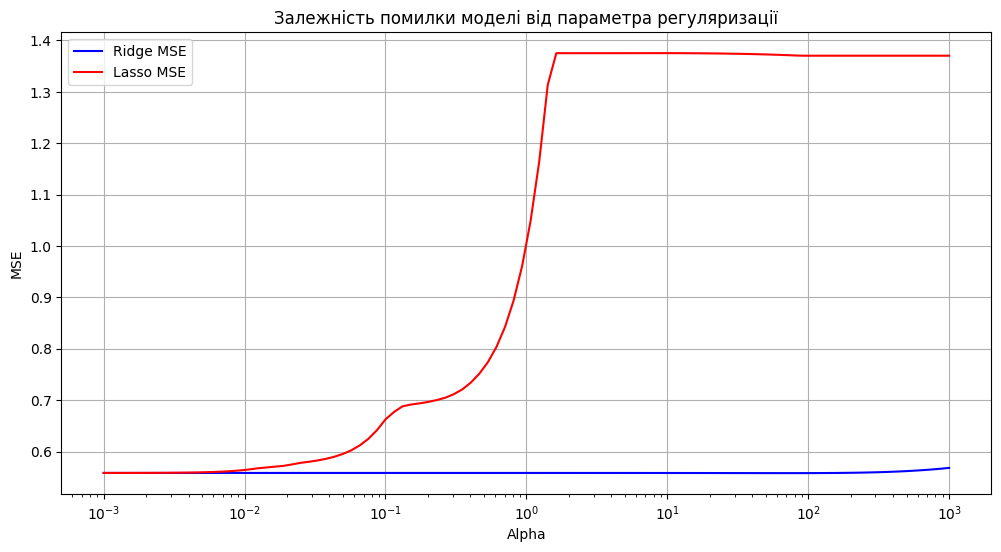

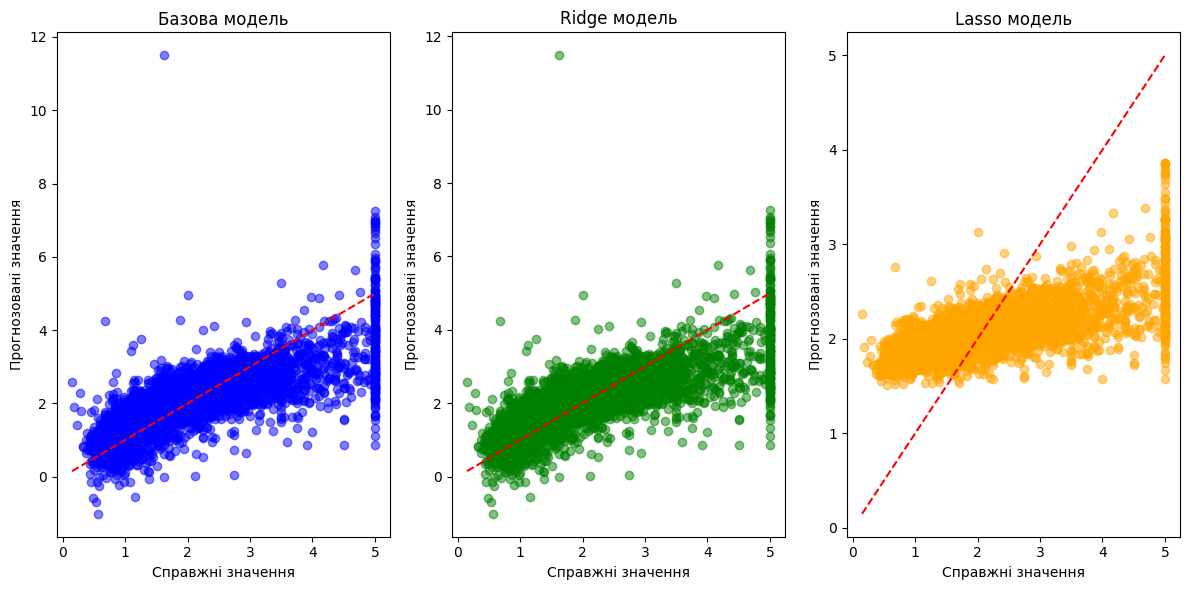

In [20]:
# 6. Візуалізація результатів
# Параметри для регуляризації
alphas = np.logspace(-3, 3, 100)
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    ridge_mse.append(cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error').mean())
    lasso_mse.append(cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error').mean())

# Графік помилок моделей
plt.figure(figsize=(12, 6))
plt.plot(alphas, -np.array(ridge_mse), label='Ridge MSE', color='blue')
plt.plot(alphas, -np.array(lasso_mse), label='Lasso MSE', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Залежність помилки моделі від параметра регуляризації')
plt.legend()
plt.grid()
plt.show()

# Візуалізація розподілу помилок моделей
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Базова модель')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Ridge модель')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Lasso модель')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.tight_layout()
plt.show()

In [ ]:
'''Використання California Housing Dataset для побудови регресійних моделей
дозволило виявити різницю у продуктивності між базовою моделлю, Ridge і Lasso
моделями. Використання регуляризації зменшило перенавчання і підвищило точність
моделей. Графіки показують залежність помилок моделей від параметрів
регуляризації, а також розподіл помилок моделей, що допомагає оцінити їх ефективність.'''

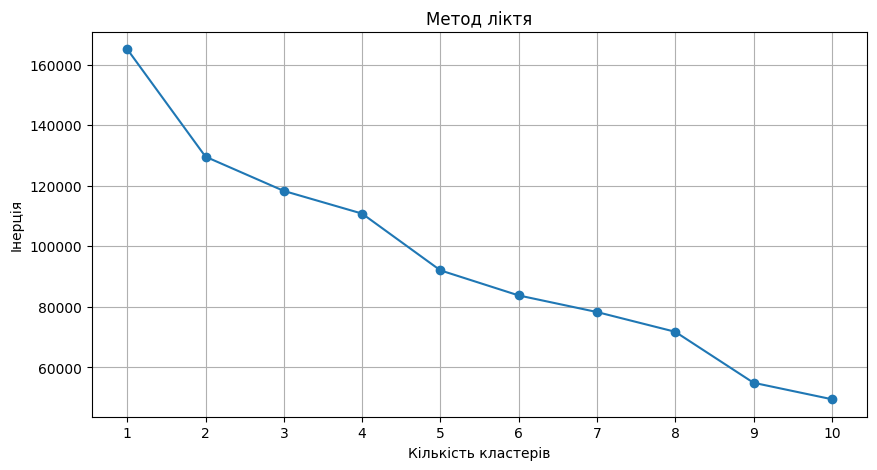

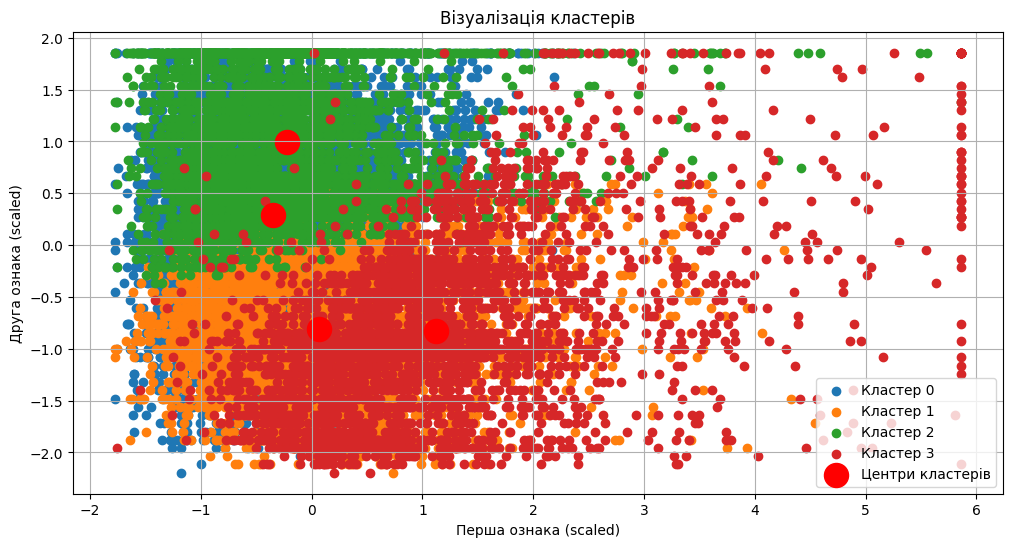

In [22]:
'''Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
Зробити візуалізацію кластерів.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Завантаження даних
california_housing = fetch_california_housing()
X = california_housing.data

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визначення оптимальної кількості кластерів за допомогою методу ліктя
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Графік методу ліктя
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.xticks(k_values)
plt.grid()
plt.show()

# Вибір оптимальної кількості кластерів (на прикладі 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів
plt.figure(figsize=(12, 6))
for i in range(optimal_k):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], label=f'Кластер {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Центри кластерів')
plt.title('Візуалізація кластерів')
plt.xlabel('Перша ознака (scaled)')
plt.ylabel('Друга ознака (scaled)')
plt.legend()
plt.grid()
plt.show()



In [ ]:
'''У другому завданні кластеризації даних за допомогою методу ліктя було
визначено оптимальну кількість кластерів, що дозволило ефективно класифікувати
дані каліфорнійського житла. Візуалізація кластерів продемонструвала чітке
розподілення об'єктів, що свідчить про добру роздільну здатність моделі.
Отримані результати можуть бути корисними для аналізу структур даних і
прийняття бізнес-рішень у сфері нерухомості. Рекомендується також дослідити
інші методи кластеризації для порівняння результатів.
'''